 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [130]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [131]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [132]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [133]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [134]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [135]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [136]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [137]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [138]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [139]:
# Rename Column
daily_returns_sp500 = daily_returns_sp500.rename(columns={
    "Close": "S&P 500"})
daily_returns_sp500.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [140]:
combined_df = pd.concat([whale_returns, algo_returns, daily_returns_sp500], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

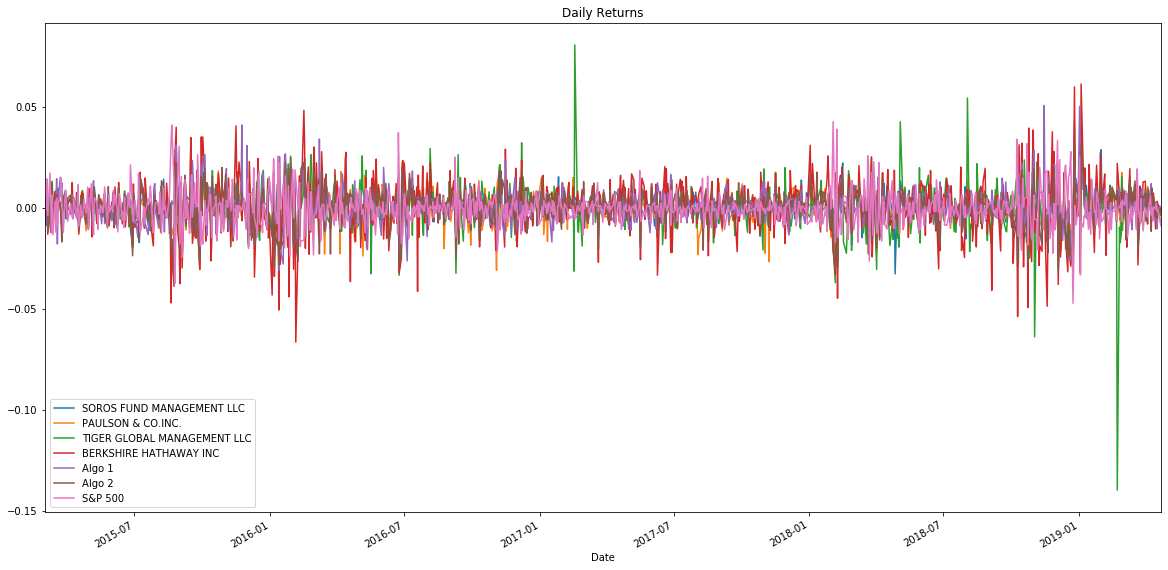

In [141]:
# Plot daily returns
combined_df.plot(figsize=(20,10), title="Daily Returns")

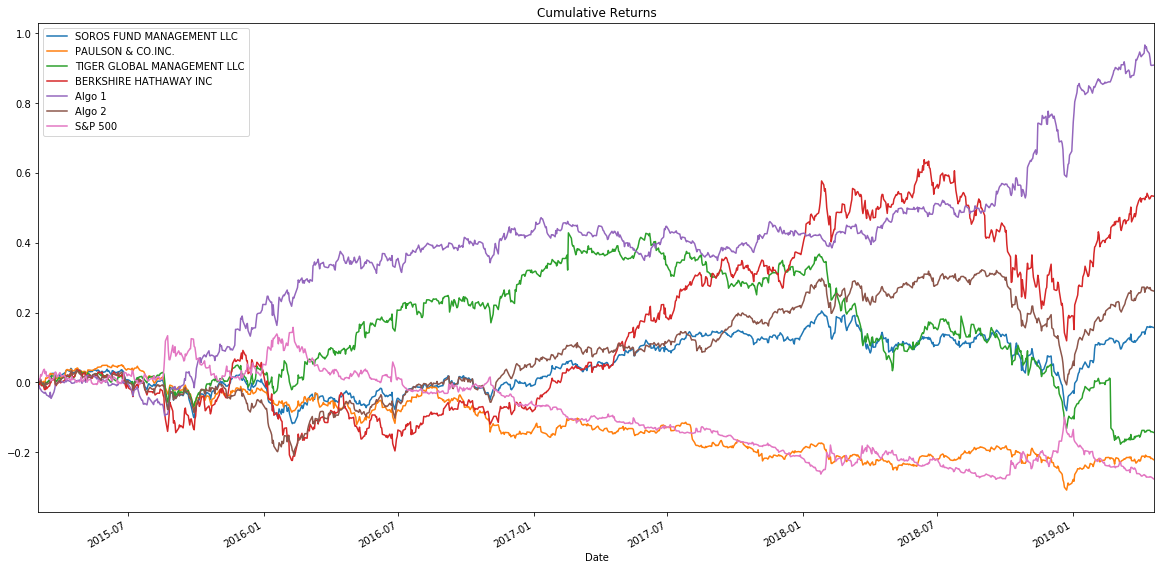

In [142]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

## QUESTION: 1.Does any portfolio outperform the S&P 500?
Yes, all porfolios outperformed the S&P 500. 

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

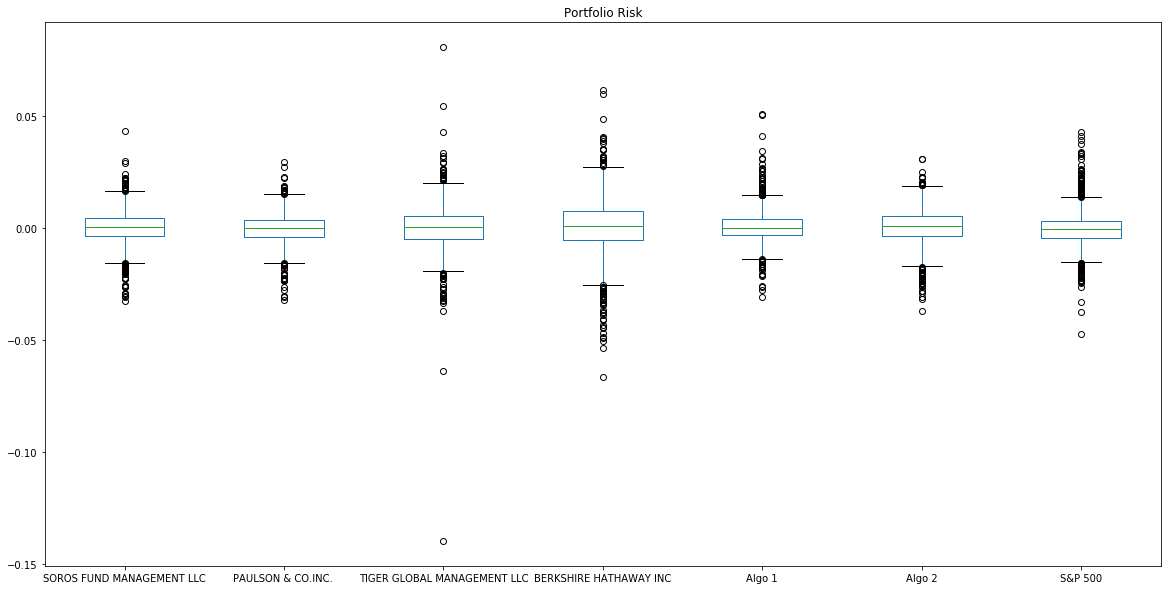

In [143]:
# Box plot to visually show risk
combined_df.plot(kind="box", figsize=(20,10), title="Portfolio Risk")

## QUESTION: 1. Which box has the largest spread? Which has the smallest spread?
Tiger Global Management LLC ahs the largest spread and Paulson & Co. Inc. had the smallest spread. 

In [144]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
portfolio_risk = combined_df.std()
portfolio_risk

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007624
Algo 2                         0.008338
S&P 500                        0.008584
dtype: float64

In [145]:
# Determine which portfolios are riskier than the S&P 500
SP_500_Risk = portfolio_risk[-1]
portfolio_risk.to_frame()
portfolio_risk.apply(lambda x : True if x> SP_500_Risk else False)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

## QUESTION: 2. Which portfolios are riskier than the S&P 500?
Both Tiger Global Management LLC and Berkshire Hathaway Inc were riskier than the S&P 500.

In [146]:
# Calculate the annualized standard deviation (252 trading days)
annual_portfolio_risk = combined_df.std() * np.sqrt (252)
annual_portfolio_risk

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121026
Algo 2                         0.132357
S&P 500                        0.136268
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

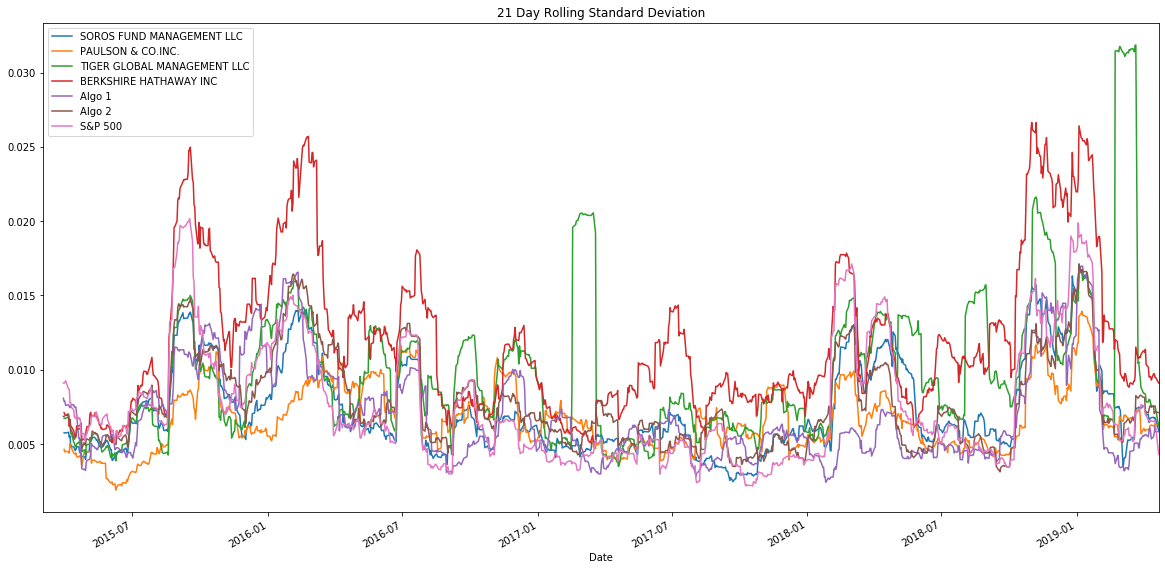

In [147]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

## QUESTION: 1. Does risk increase for each of the portfolios at the same time risk increases in the S&P?
Although risk does increase for each of the portfolios at the same time risk increases in the S&P 500 it is much more dramatic in some cases like the Tiger Global Management LLC.

In [148]:
# Correlation
price_correlation = combined_df.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287258,-0.034561
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287258,1.000000,-0.002001
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.034561,-0.002001,1.000000


## QUESTION: 2. Which returns most closely mimic the S&P?
The Paulson & Co. Inc. returns most closely mimic the S&P 500.

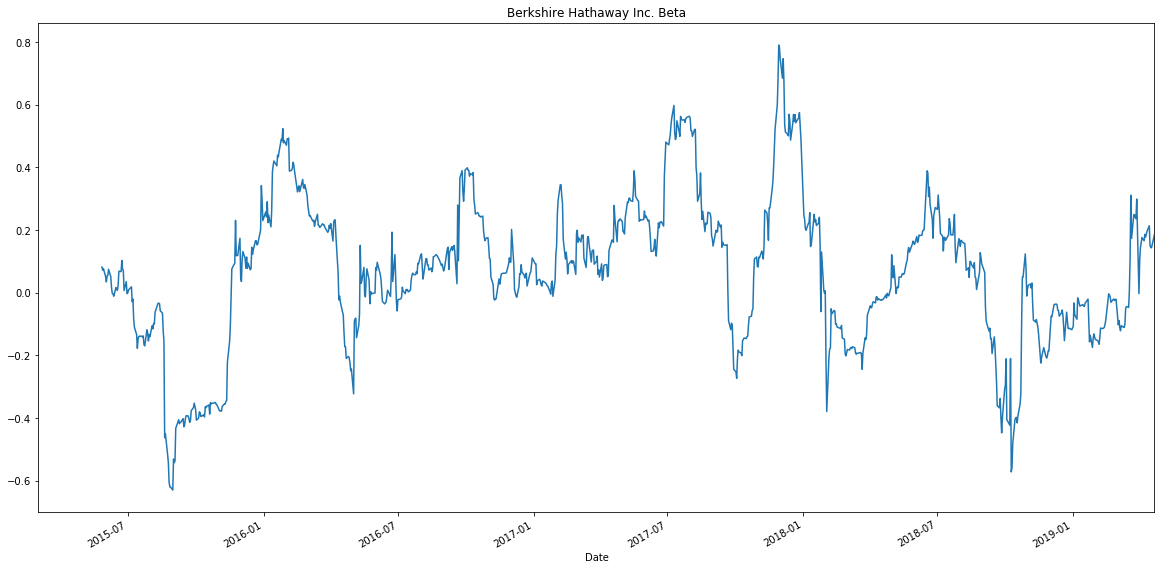

In [149]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["S&P 500"])
covariance
variance = combined_df['S&P 500'].var()
berkshire_beta = covariance / variance
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

## QUESTION: 3. Does the portfolio seem sensitive to movements in the S&P 500?
Yes, the Berkshire Hathaway porfolio seems sensitive to the movements in the S&P 500 because the beta is sometimes reaching up to 0.8 which means that it is still 20% less riskier than the S&P 500. 

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [150]:
combined_df.ewm(halflife=21)

EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [151]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.351769
Algo 2                         0.489915
S&P 500                       -0.510171
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

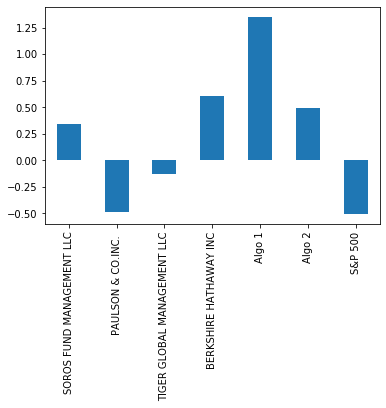

In [152]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

## QUESTION: 2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Yes, Algo 1 outperformed the S&P 500 and all the whales's portfolios but a long shot. Algo 2 was better than most but under performed the Berkshire Hathaway Inc. portfolio.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [153]:
# Read the first stock
aapl_historical_csv = Path("../Resources/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [154]:
# Read the second stock
cost_historical_csv = Path("../Resources/cost_historical.csv")
cost_historical = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [155]:
# Read the third stock
goog_historical_csv = Path("../Resources/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [156]:
# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([aapl_historical, cost_historical, goog_historical], axis="rows", join="outer")
custom_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [157]:
# Reset the index
custom_df.reset_index()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [158]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
custom_df = custom_df.pivot(columns="Symbol", values="NOCP")
custom_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [159]:
# Drop Nulls
custom_daily_returns = custom_df.pct_change()
custom_daily_returns.dropna(inplace=True)
custom_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_portfolio_returns = custom_daily_returns.dot(weights)
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
all_portfolio_returns = pd.concat([combined_df, custom_portfolio_returns], axis="columns", join="inner")
x = all_portfolio_returns.columns[-1]
all_portfolio_returns = all_portfolio_returns.rename(columns={x:"Custom"})
all_portfolio_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500', 'Custom'],
      dtype='object')

In [162]:
# Only compare dates where the new, custom portfolio has dates
all_portfolio_returns.isnull()
all_portfolio_returns.dropna(axis=0, how="any", inplace=True)
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [163]:
# Risk
all_portfolio_risk = all_portfolio_returns.std() * np.sqrt (252)
all_portfolio_risk

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

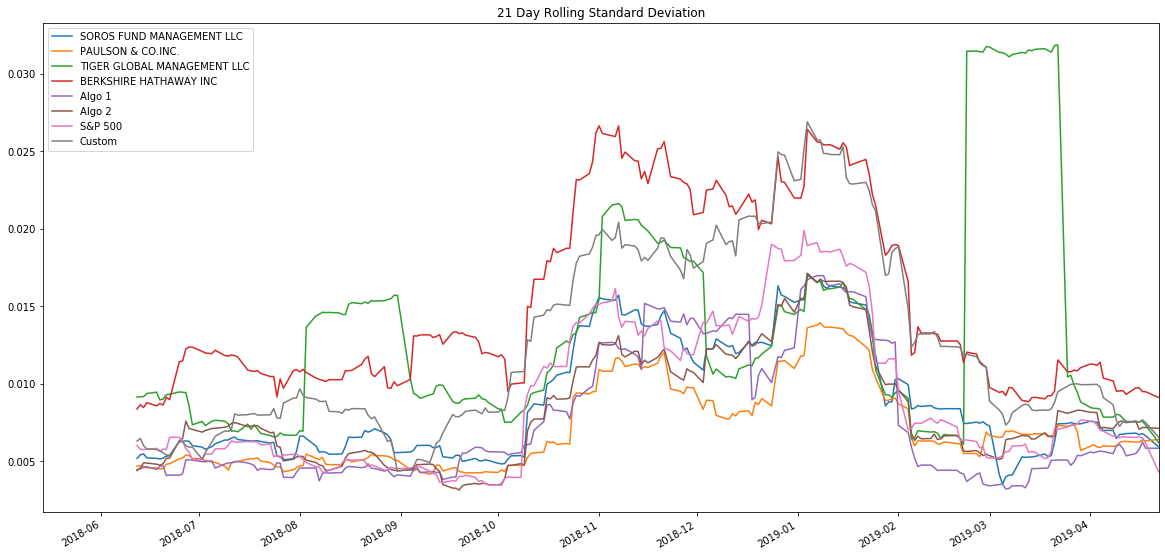

In [164]:
# Rolling
all_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

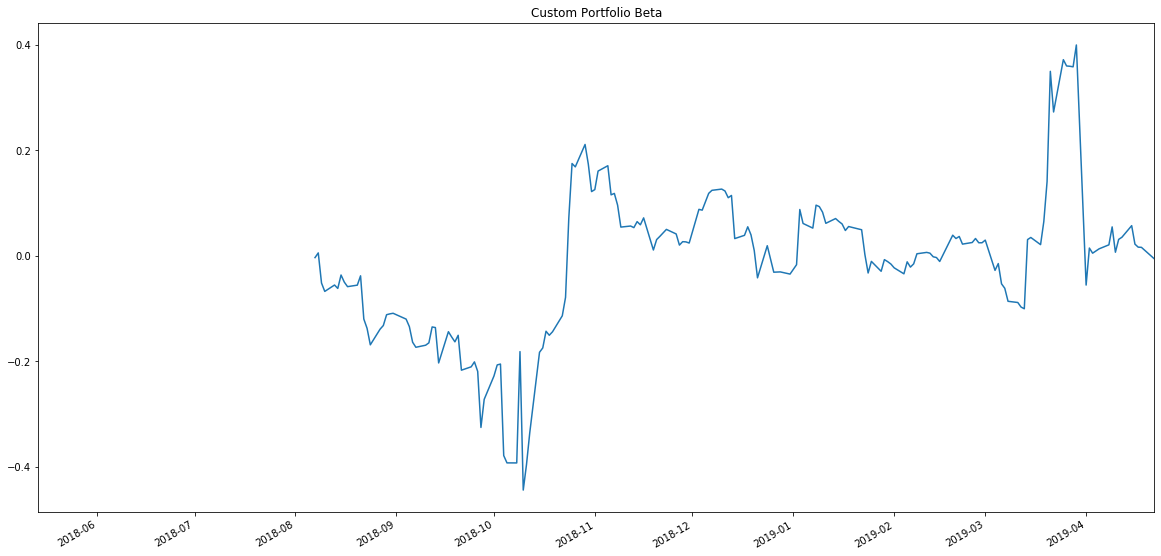

In [165]:
# Beta
covariance_all = all_portfolio_returns['Custom'].cov(all_portfolio_returns['S&P 500'])
covariance_all
variance_all = all_portfolio_returns['S&P 500'].var()
berkshire_beta = covariance / variance
rolling_covariance_all = all_portfolio_returns['Custom'].rolling(window=60).cov(all_portfolio_returns['S&P 500'])
rolling_variance_all = all_portfolio_returns['S&P 500'].rolling(window=60).var()
rolling_beta_all = rolling_covariance_all / rolling_variance_all
rolling_beta_all.plot(figsize=(20, 10), title='Custom Portfolio Beta')

In [166]:
# Annualzied Sharpe Ratios
sharpe_ratios_all = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios_all

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

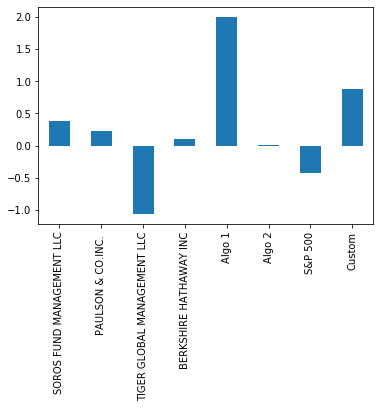

In [167]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar")

## Include correlation analysis to determine which stocks (if any) are correlated

In [168]:
#Correlation
all_portfolio_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


## QUESTION: How does your portfolio fair?
The Custom porfolio did really well but still not as good as the Algo 1. Although, the risk compared to the S&P 500 was about 60% lower than the S&P 500 make it much less risky than the S&P 500. 